In [1]:
import vice
import surp
import arya
import numpy as np
import matplotlib.pyplot as plt

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
from surp import gce_math as gcem

In [3]:
def plot_yield(y, **kwargs):
    x = np.linspace(-2, 1, 1000)
    z = gcem.MH_to_Z(x)
    plt.plot(x, np.vectorize(y)(z), **kwargs)

In [11]:
A=0.001
MH1 = -0.7
Z1 = gcem.MH_to_Z(MH1)
y0 = MH1**2 * A
y_q_m1 = surp.yield_models.Quadratic_CC(y0=y0, zeta=-MH1*2*A, A=A, Z1=Z1)

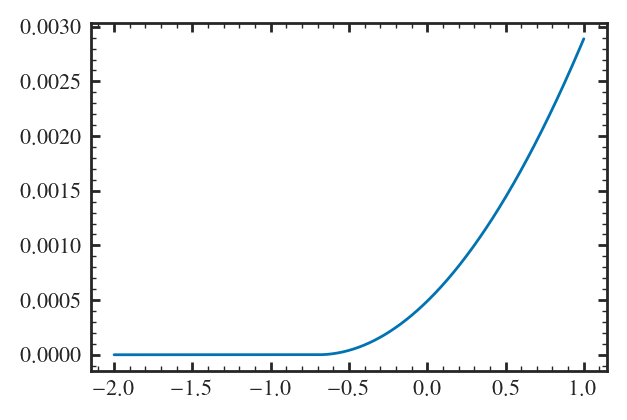

In [12]:
plot_yield(y_q_m1)

In [19]:
yp = surp.YieldParams.from_file("../models/new_fiducial/run/yield_params.toml")
surp.set_yields(yp)


In [3]:
import sys
sys.path.append("..")
import singlezone

In [24]:
model = surp.ViceModel.from_file("../models/new_fiducial/run/model.json")

In [25]:
model.history

,time,mgas,mstar,sfr,ifr,ofr,eta_0,r_eff,z_in(fe),z_in(o),...,N_MG,C_FE,C_O,C_MG,C_N,z,M_H,lookback,R,zone
0,0.00,1.000000e-12,0.000000e+00,0.000000,NaN,NaN,0.000000,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,-inf,13.20,3.85,38
1,0.02,1.850845e+07,3.935121e+04,0.002300,0.927722,0.000000,0.000000,0.144431,0.0,0.0,...,-0.305588,-0.217511,-0.667356,-0.666895,-0.361307,0.000030,-2.768489,13.18,3.85,38
2,0.04,2.243354e+07,1.541102e+05,0.004566,0.200488,0.000000,0.000000,0.185785,0.0,0.0,...,-0.305588,-0.217511,-0.667356,-0.666895,-0.361307,0.000074,-2.377570,13.16,3.85,38
3,0.06,2.510216e+07,2.647068e+05,0.006798,0.139381,0.000000,0.000000,0.186560,0.0,0.0,...,-0.305588,-0.217511,-0.667356,-0.666895,-0.361307,0.000131,-2.128255,13.14,3.85,38
4,0.08,2.718355e+07,5.476348e+05,0.008998,0.111799,0.000000,0.000000,0.215667,0.0,0.0,...,-0.305588,-0.217510,-0.667355,-0.666895,-0.361307,0.000200,-1.944112,13.12,3.85,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132195,13.12,7.850566e+07,3.838710e+08,0.038024,0.019867,0.000766,0.020134,0.401954,0.0,0.0,...,0.047247,0.006839,-0.029569,-0.029108,-0.076355,0.030840,0.243605,0.08,6.05,60
132196,13.14,7.842332e+07,3.848727e+08,0.037958,0.019321,0.000764,0.020134,0.460720,0.0,0.0,...,0.047040,0.007047,-0.029317,-0.028857,-0.075897,0.030846,0.243693,0.06,6.05,60
132197,13.16,7.834098e+07,3.898378e+08,0.037892,0.017050,0.000763,0.020134,0.420624,0.0,0.0,...,0.047678,0.007118,-0.029230,-0.028769,-0.076447,0.030871,0.244042,0.04,6.05,60
132198,13.18,7.825865e+07,3.876656e+08,0.037826,0.018533,0.000762,0.020134,0.393562,0.0,0.0,...,0.048168,0.007084,-0.029077,-0.028617,-0.076785,0.030884,0.244222,0.02,6.05,60


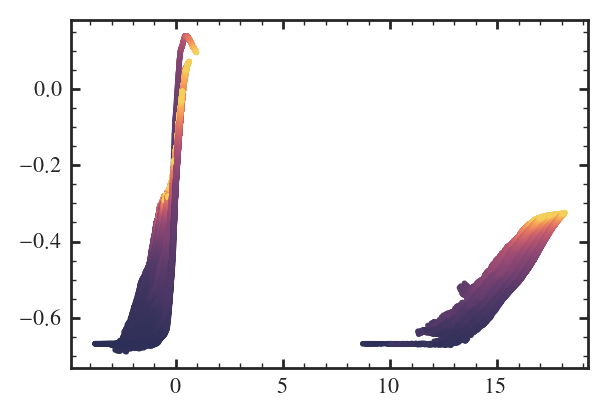

In [31]:
plt.scatter(model.history.O_H, model.history.C_O, c=model.history.time, s=1)

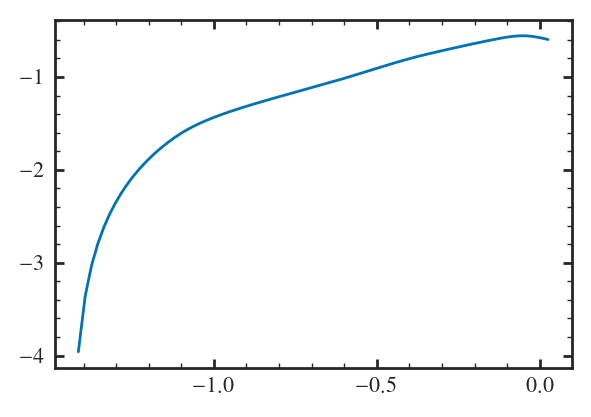

In [21]:
plt.plot(h.MG_H, h.C_MG)

In [22]:
sz, h = singlezone.run_singlezone()

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/singlezone/singlezone.py:1797: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: C

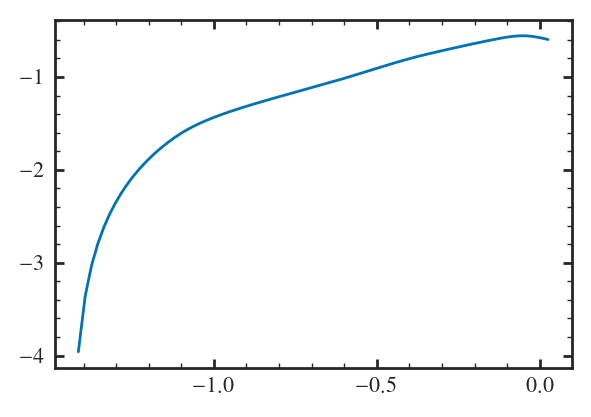

In [23]:
plt.plot(h.MG_H, h.C_MG)